In [ ]:
#Decision Tree

#Assignment


#About the data:
#Let’s consider a Company dataset with around 10 variables and 400 records.
#The attributes are as follows:
# Sales -- Unit sales (in thousands) at each location
# Competitor Price -- Price charged by competitor at each location
# Income -- Community income level (in thousands of dollars)
# Advertising -- Local advertising budget for company at each location (in thousands of dollars)
# Population -- Population size in region (in thousands)
# Price -- Price company charges for car seats at each site
# Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
# Age -- Average age of the local population
# Education -- Education level at each location
# Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
# US -- A factor with levels No and Yes to indicate whether the store is in the US or not
#The company dataset looks like this:

#Problem Statement:
#A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
#Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
company_data = pd.read_csv('/content/Company_Data.csv')

In [ ]:
# Convert the 'Sales' variable to categorical (High/Low sales)
company_data['Sales_Category'] = pd.cut(company_data['Sales'], bins=[-float('inf'), company_data['Sales'].mean(), float('inf')], labels=['Low', 'High'])

In [ ]:
# Selecting features and target variable
features = company_data.drop(['Sales', 'Sales_Category'], axis=1)
target = company_data['Sales_Category']

In [ ]:
# Print column names to inspect them
print(features.columns)

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


In [ ]:
# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['ShelveLoc', 'Urban', 'US'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Display the decision tree rules
tree_rules = export_text(model, feature_names=list(features.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Price <= 92.50
|   |--- Population <= 253.50
|   |   |--- ShelveLoc_Bad <= 0.50
|   |   |   |--- CompPrice <= 101.50
|   |   |   |   |--- CompPrice <= 98.50
|   |   |   |   |   |--- class: High
|   |   |   |   |--- CompPrice >  98.50
|   |   |   |   |   |--- class: Low
|   |   |   |--- CompPrice >  101.50
|   |   |   |   |--- class: High
|   |   |--- ShelveLoc_Bad >  0.50
|   |   |   |--- CompPrice <= 124.50
|   |   |   |   |--- class: Low
|   |   |   |--- CompPrice >  124.50
|   |   |   |   |--- class: High
|   |--- Population >  253.50
|   |   |--- class: High
|--- Price >  92.50
|   |--- ShelveLoc_Good <= 0.50
|   |   |--- Age <= 49.50
|   |   |   |--- Price <= 126.50
|   |   |   |   |--- Advertising <= 2.50
|   |   |   |   |   |--- CompPrice <= 135.50
|   |   |   |   |   |   |--- Income <= 76.50
|   |   |   |   |   |   |   |--- Price <= 103.00
|   |   |   |   |   |   |   |   |--- class: High
|   |   |   |   |   |   |   |--- Price >  103.00
|   |   |   |   

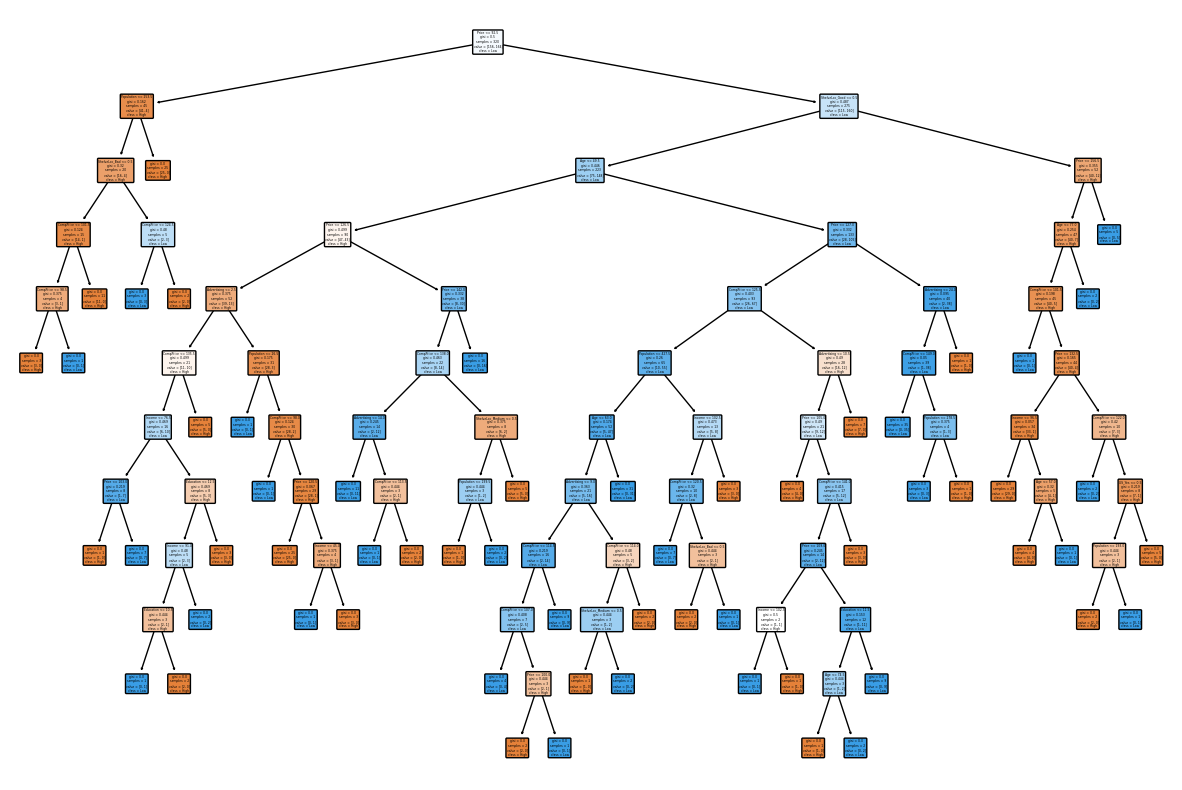

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=list(features.columns), class_names=model.classes_, filled=True, rounded=True)
plt.show()

In [ ]:
# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"\nAccuracy on Test Set: {accuracy:.2f}")


Accuracy on Test Set: 0.72
